In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('telecom_customer_churn.csv')

In [3]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [4]:
df.shape

(7043, 38)

# Data Cleaning and EDA

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [7]:
df.columns=df.columns.str.replace(" ","").str.lower()

In [8]:
df['avgmonthlylongdistancecharges']=df['avgmonthlylongdistancecharges'].fillna(0.0)

In [9]:
df['multiplelines'] = df['multiplelines'].fillna('no phone services')

In [10]:
no_internet = ['Internet Type','Online Security','Online Backup','Device Protection Plan','Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data']

df['internettype']=df['internettype'].fillna('no internet service')
df['onlinesecurity']=df['onlinesecurity'].fillna('no internet service')
df['onlinebackup']=df['onlinebackup'].fillna('no internet service')
df['deviceprotectionplan']=df['deviceprotectionplan'].fillna('no internet service')
df['premiumtechsupport']=df['premiumtechsupport'].fillna('no internet service')
df['streamingtv']=df['streamingtv'].fillna('no internet service')
df['streamingmovies']=df['streamingmovies'].fillna('no internet service')
df['streamingmusic']=df['streamingmusic'].fillna('no internet service')                                        
df['unlimiteddata']=df['unlimiteddata'].fillna('no internet service')

In [11]:
df['avgmonthlygbdownload']=df['avgmonthlygbdownload'].fillna(0)

In [12]:
df.isnull().sum()

customerid                          0
gender                              0
age                                 0
married                             0
numberofdependents                  0
city                                0
zipcode                             0
latitude                            0
longitude                           0
numberofreferrals                   0
tenureinmonths                      0
offer                               0
phoneservice                        0
avgmonthlylongdistancecharges       0
multiplelines                       0
internetservice                     0
internettype                        0
avgmonthlygbdownload                0
onlinesecurity                      0
onlinebackup                        0
deviceprotectionplan                0
premiumtechsupport                  0
streamingtv                         0
streamingmovies                     0
streamingmusic                      0
unlimiteddata                       0
contract    

In [13]:
df=df.drop(columns=['customerid','churncategory','churnreason','totalrefunds','zipcode','longitude','latitude','city'])

In [14]:
df.head()

,gender,age,married,numberofdependents,numberofreferrals,tenureinmonths,offer,phoneservice,avgmonthlylongdistancecharges,multiplelines,internetservice,internettype,avgmonthlygbdownload,onlinesecurity,onlinebackup,deviceprotectionplan,premiumtechsupport,streamingtv,streamingmovies,streamingmusic,unlimiteddata,contract,paperlessbilling,paymentmethod,monthlycharge,totalcharges,totalextradatacharges,totallongdistancecharges,totalrevenue,customerstatus
0,Female,37,Yes,0,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0,381.51,974.81,Stayed
1,Male,46,No,0,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,10,96.21,610.28,Stayed
2,Male,50,No,0,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0,134.60,415.45,Churned
3,Male,78,Yes,0,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0,361.66,1599.51,Churned
4,Female,75,Yes,0,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0,22.14,289.54,Churned


<AxesSubplot:xlabel='customerstatus', ylabel='count'>

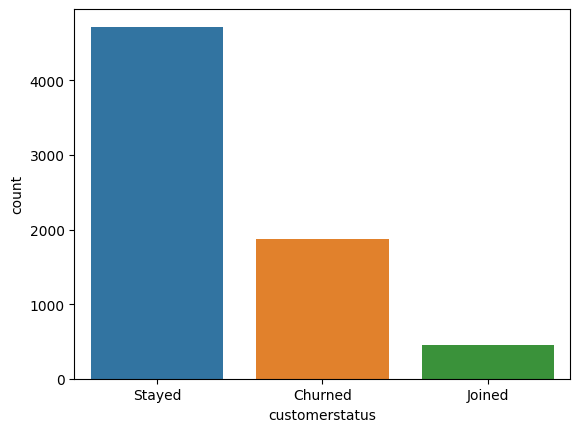

In [15]:
sns.countplot(df['customerstatus'])

In [16]:
df=df.loc[~df.customerstatus.str.contains('Join')]
df.reset_index(drop=True,inplace=True)

In [17]:
df.shape

(6589, 30)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6589 entries, 0 to 6588
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         6589 non-null   object 
 1   age                            6589 non-null   int64  
 2   married                        6589 non-null   object 
 3   numberofdependents             6589 non-null   int64  
 4   numberofreferrals              6589 non-null   int64  
 5   tenureinmonths                 6589 non-null   int64  
 6   offer                          6589 non-null   object 
 7   phoneservice                   6589 non-null   object 
 8   avgmonthlylongdistancecharges  6589 non-null   float64
 9   multiplelines                  6589 non-null   object 
 10  internetservice                6589 non-null   object 
 11  internettype                   6589 non-null   object 
 12  avgmonthlygbdownload           6589 non-null   f

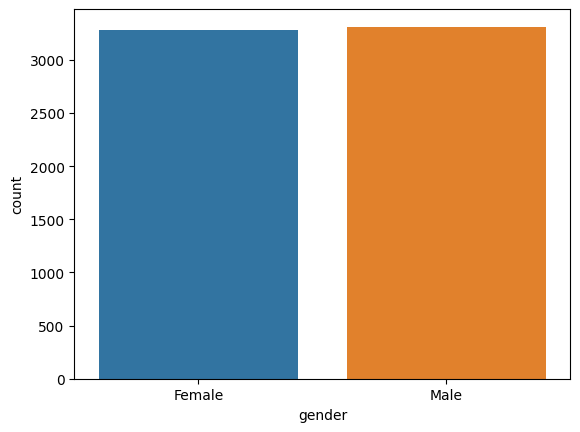

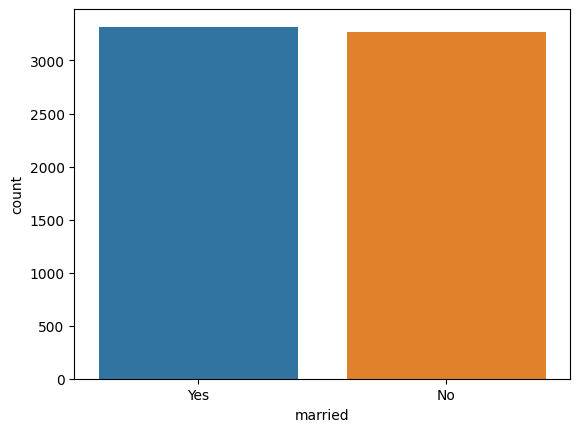

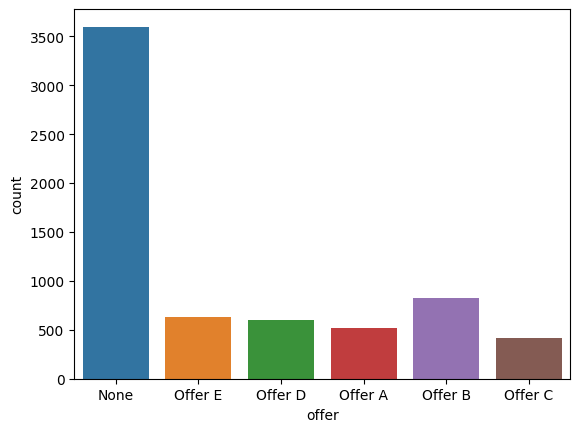

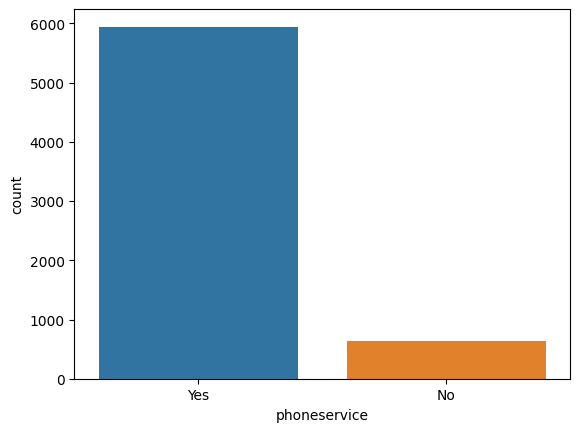

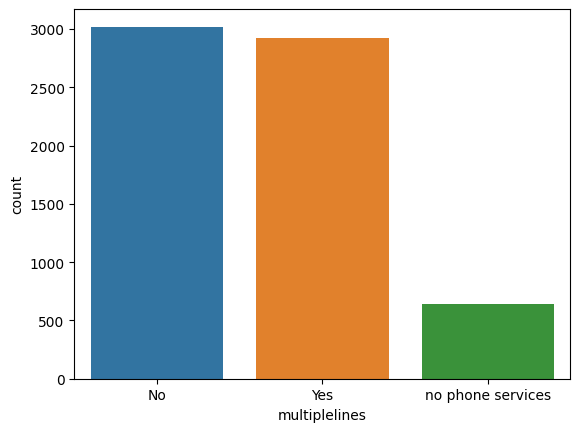

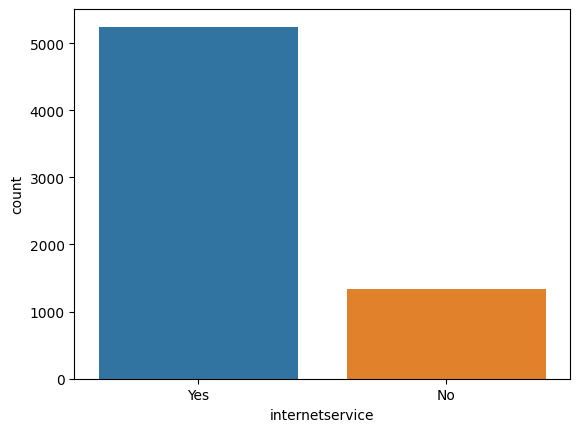

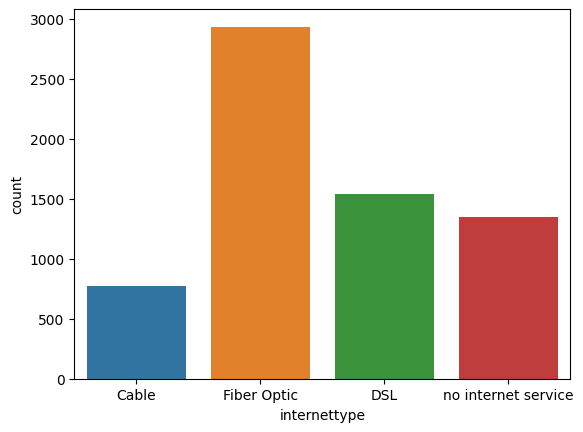

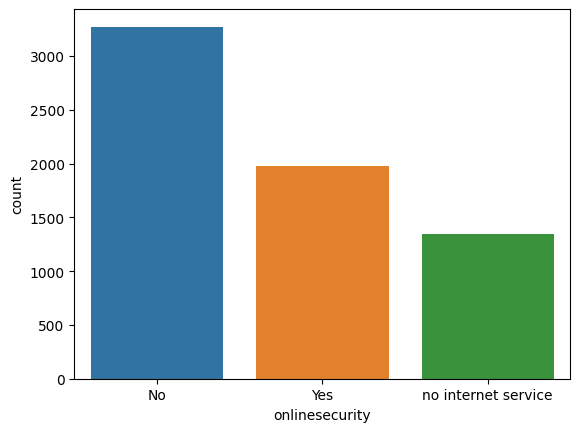

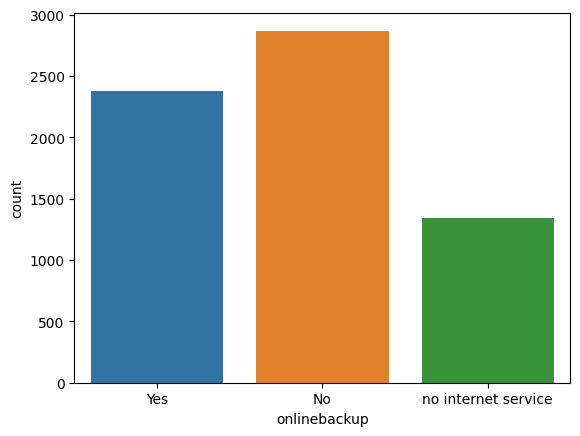

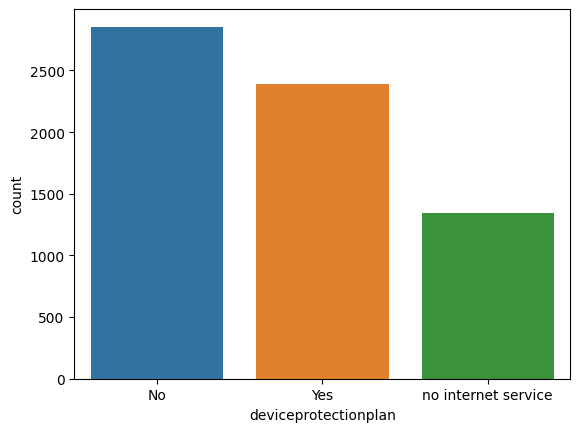

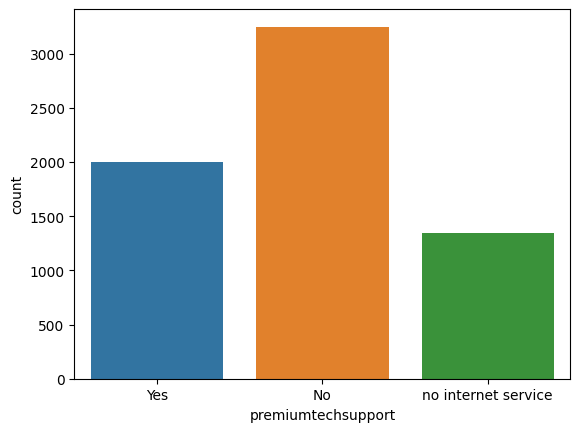

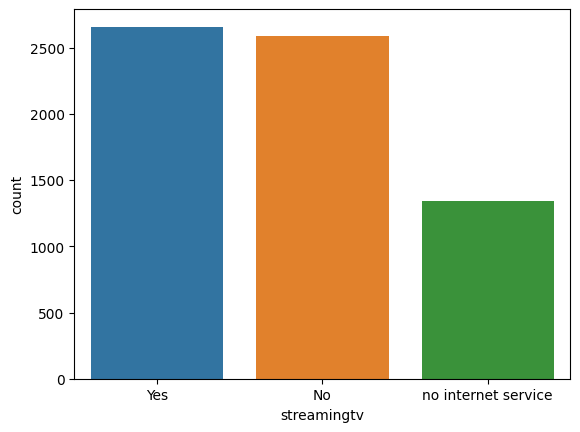

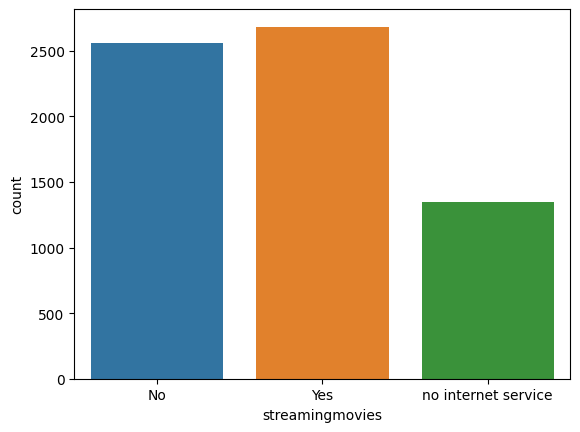

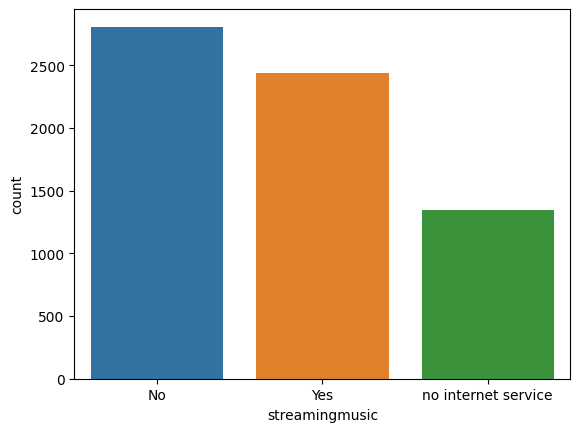

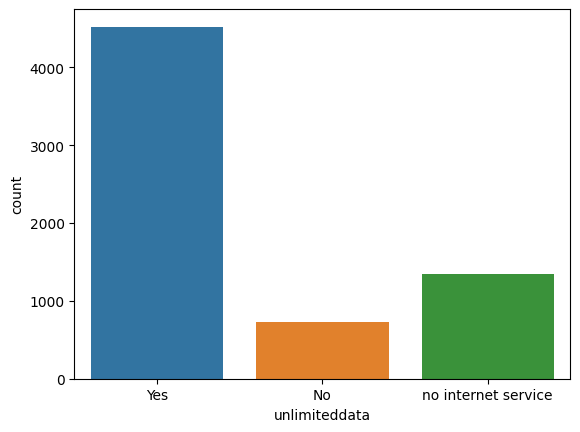

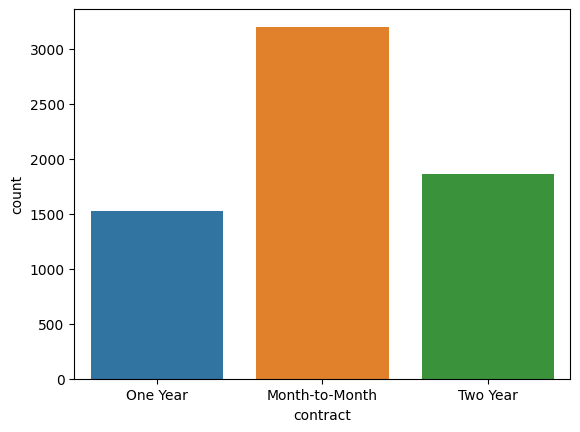

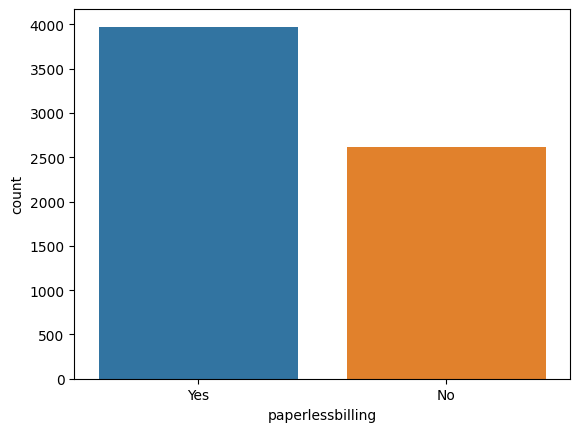

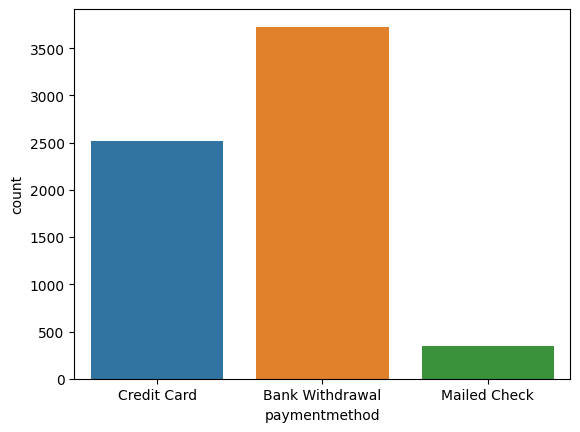

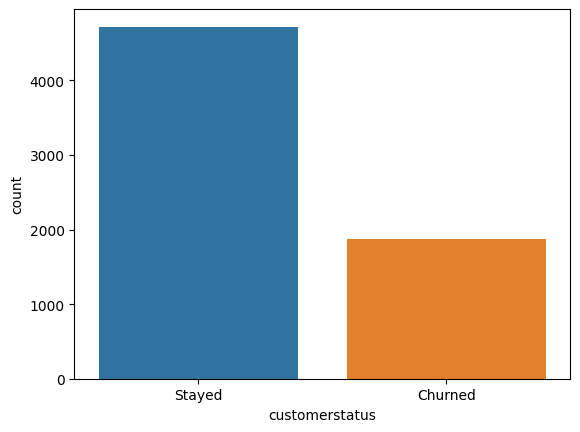

In [19]:
for i in df.columns:
    if df[i].dtype == 'object':
        sns.countplot(df[i])
        plt.show()

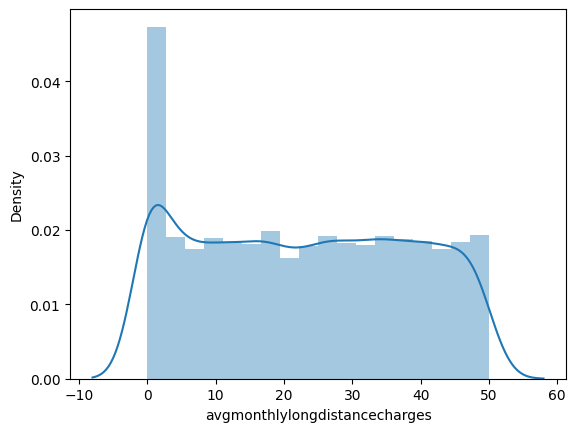

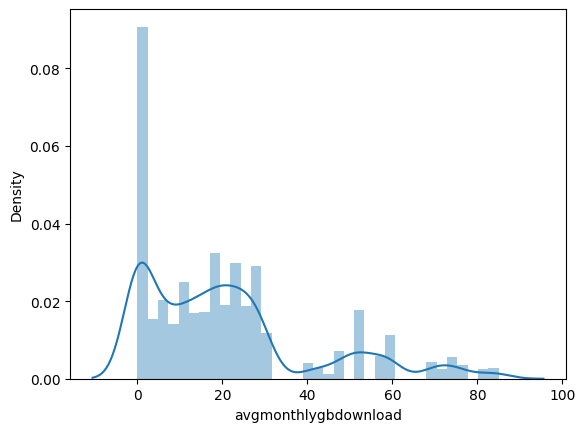

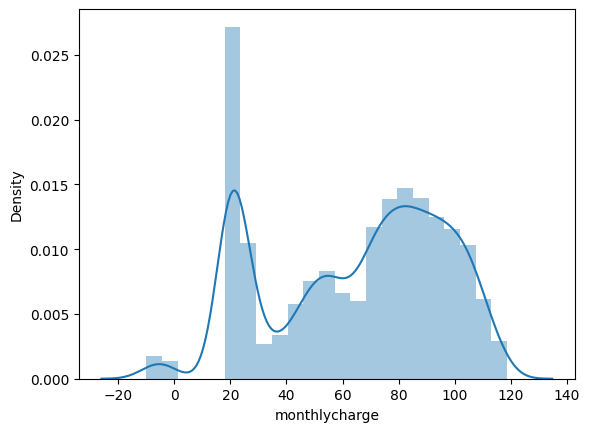

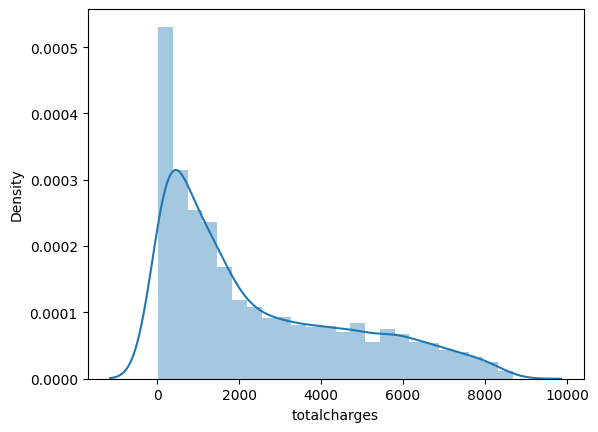

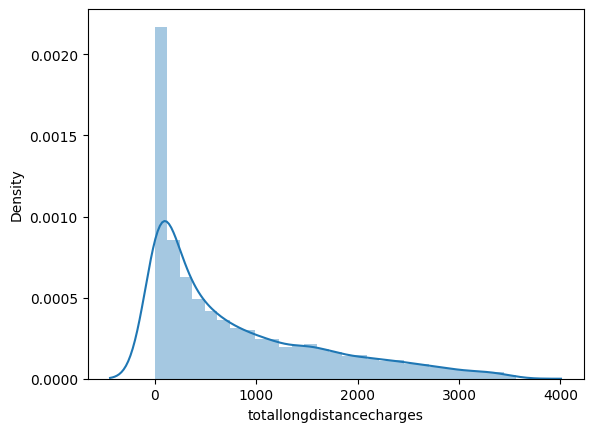

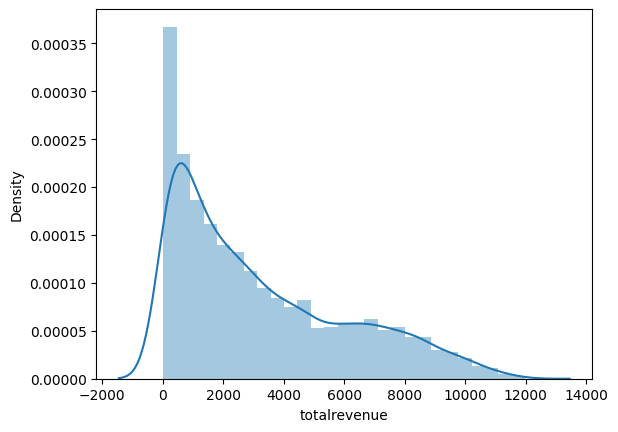

In [20]:
for i in df.columns:
    if df[i].dtype == 'float64':
        sns.distplot(df[i],kde=True)
        plt.show()


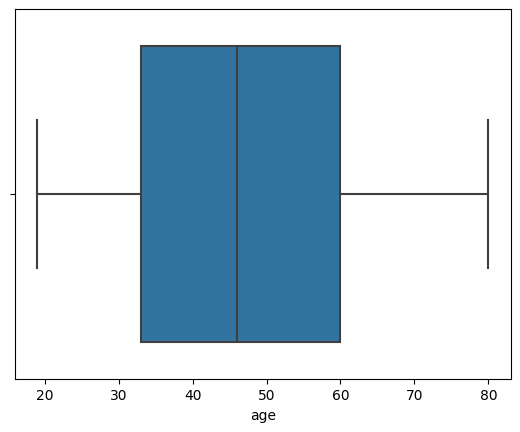

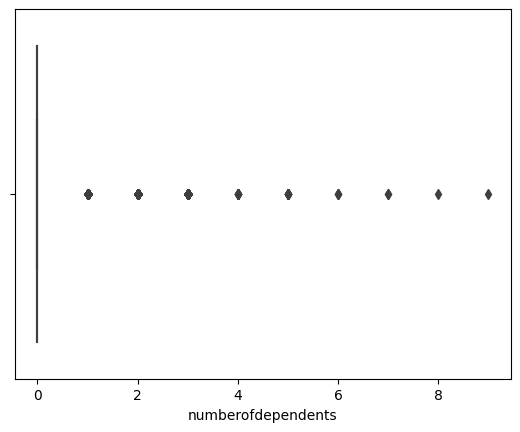

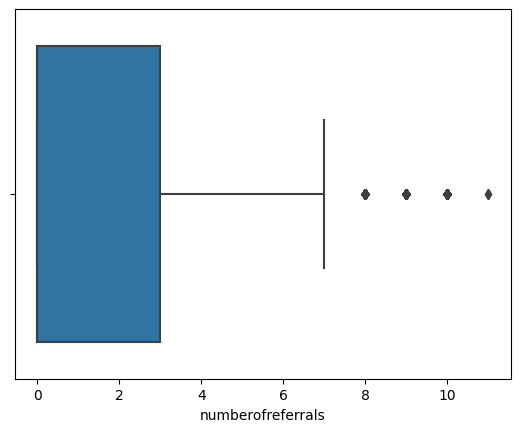

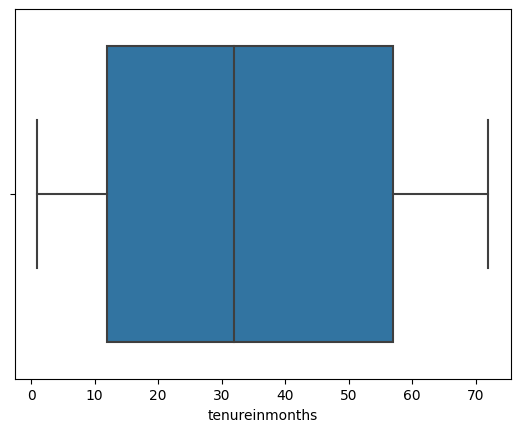

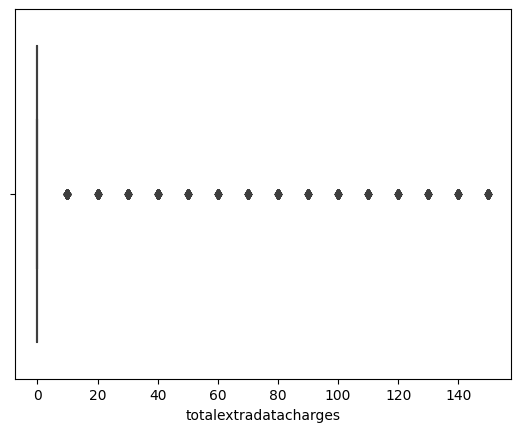

In [21]:
for i in df.columns:
    if df[i].dtype == 'int64':
        sns.boxplot(df[i])
        plt.show()

In [22]:
df.head()

,gender,age,married,numberofdependents,numberofreferrals,tenureinmonths,offer,phoneservice,avgmonthlylongdistancecharges,multiplelines,internetservice,internettype,avgmonthlygbdownload,onlinesecurity,onlinebackup,deviceprotectionplan,premiumtechsupport,streamingtv,streamingmovies,streamingmusic,unlimiteddata,contract,paperlessbilling,paymentmethod,monthlycharge,totalcharges,totalextradatacharges,totallongdistancecharges,totalrevenue,customerstatus
0,Female,37,Yes,0,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0,381.51,974.81,Stayed
1,Male,46,No,0,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,10,96.21,610.28,Stayed
2,Male,50,No,0,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0,134.60,415.45,Churned
3,Male,78,Yes,0,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0,361.66,1599.51,Churned
4,Female,75,Yes,0,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0,22.14,289.54,Churned


# Model Building

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [24]:
df.columns

Index(['gender', 'age', 'married', 'numberofdependents', 'numberofreferrals',
       'tenureinmonths', 'offer', 'phoneservice',
       'avgmonthlylongdistancecharges', 'multiplelines', 'internetservice',
       'internettype', 'avgmonthlygbdownload', 'onlinesecurity',
       'onlinebackup', 'deviceprotectionplan', 'premiumtechsupport',
       'streamingtv', 'streamingmovies', 'streamingmusic', 'unlimiteddata',
       'contract', 'paperlessbilling', 'paymentmethod', 'monthlycharge',
       'totalcharges', 'totalextradatacharges', 'totallongdistancecharges',
       'totalrevenue', 'customerstatus'],
      dtype='object')

In [25]:
X = df[['married','numberofdependents','tenureinmonths','internetservice','contract']]

In [26]:
Y = df['customerstatus']

In [27]:
X

,married,numberofdependents,tenureinmonths,internetservice,contract
0,Yes,0,9,Yes,One Year
1,No,0,9,Yes,Month-to-Month
2,No,0,4,Yes,Month-to-Month
3,Yes,0,13,Yes,Month-to-Month
4,Yes,0,3,Yes,Month-to-Month
...,...,...,...,...,...
6584,No,0,4,No,Month-to-Month
6585,No,0,13,Yes,One Year
6586,Yes,0,22,Yes,Month-to-Month
6587,Yes,0,67,Yes,Two Year


In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(Y)


In [29]:
y_encoded

array([1, 1, 0, ..., 0, 1, 1])

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), ['internetservice', 'contract', 'married']),
    ('num', StandardScaler(), ['numberofdependents', 'tenureinmonths'])
])

# Define the logistic regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model performance
print('Test accuracy:', model.score(X_test, y_test))
print(classification_report(y_test, y_pred))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))


Test accuracy: 0.8118361153262519
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       383
           1       0.87      0.87      0.87       935

    accuracy                           0.81      1318
   macro avg       0.77      0.77      0.77      1318
weighted avg       0.81      0.81      0.81      1318

Confusion matrix:
[[259 124]
 [124 811]]


In [31]:
new_data = {'married': 'No', 'numberofdependents': 0, 'tenureinmonths': 9,
            'internetservice': 'Yes', 'contract':'Month-to-Month' }

# Convert the input data to a DataFrame
new_df = pd.DataFrame([new_data])

# Use the predict method to predict churn for the new data
churn_prediction = model.predict(new_df)

# Print the churn prediction for the new data
if churn_prediction[0] == 0:
    print("The customer is not likely to churn.")
else:
    print("The customer is likely to churn.")



The customer is not likely to churn.


# MLFLOW

In [32]:
import mlflow

In [33]:
mlflow.set_experiment("Teleco Customer Churn Prediction")

Traceback (most recent call last):
  File "C:\Users\LENOVO X1 YOGA\AppData\Local\Programs\Python\Python39\lib\site-packages\mlflow\store\tracking\file_store.py", line 290, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
  File "C:\Users\LENOVO X1 YOGA\AppData\Local\Programs\Python\Python39\lib\site-packages\mlflow\store\tracking\file_store.py", line 383, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
  File "C:\Users\LENOVO X1 YOGA\AppData\Local\Programs\Python\Python39\lib\site-packages\mlflow\store\tracking\file_store.py", line 1096, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
  File "C:\Users\LENOVO X1 YOGA\AppData\Local\Programs\Python\Python39\lib\site-packages\mlflow\store\tracking\file_store.py", line 1089, in _read_helper
    result = read_yaml(root, file_name)
  File "C:\Users\LENOVO X1 YOGA\AppData\Local\Programs\Python\Python39\lib\site-packages\mlflow\utils\file

<Experiment: artifact_location='file:///C:/Users/LENOVO%20X1%20YOGA/Desktop/innomatics/customer_churn/mlruns/737725701078471086', creation_time=1683574051065, experiment_id='737725701078471086', last_update_time=1683574051065, lifecycle_stage='active', name='Teleco Customer Churn Prediction', tags={}>

# Experiment 1 : Logistic Regression

In [34]:
import mlflow
import sqlite3
import pickle
# Connect to the SQLite database
conn = sqlite3.connect('mlflow.db')

# Set the tracking URI to the SQLite database file path
mlflow.set_tracking_uri("sqlite:///C:/Users/LENOVO X1 YOGA/Desktop/innomatics/customer_churn/mlflow.db")


mlflow.set_experiment("Teleco Customer Churn Prediction")



with mlflow.start_run(run_name='Linear Regression'):
    mlflow.set_tag('dev', 'AYESHA FARHEEN')
    mlflow.set_tag('Algos', 'Linear Regression')
    
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

    # Define the preprocessing steps
    preprocessor = ColumnTransformer(transformers=[
        ('cat', OneHotEncoder(drop='first'), ['internetservice', 'contract', 'married']),
        ('num', StandardScaler(), ['numberofdependents', 'tenureinmonths'])
    ])

    # Define the logistic regression model
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression())
    ])

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model performance
    accuracy = model.score(X_test, y_test)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    print('Test accuracy:', accuracy)
    print(report)
    print('Confusion matrix:')
    print(confusion)

    # Log the performance metrics and model parameters to MLflow
    mlflow.log_metric('accuracy', accuracy)
    mlflow.log_param('preprocessor', 'OneHotEncoder + StandardScaler')
    mlflow.log_param('classifier', 'Logistic Regression')
    mlflow.log_param('drop', 'first')
    mlflow.sklearn.log_model(model, 'model')
    
    
    # Save the trained model as a pickle file 
    with open('lr_model.pickle', 'wb') as f:
        pickle.dump(model, f)

    
    



2023/05/09 10:00:16 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2023/05/09 10:00:16 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Running upgrade  -> 451aebb31d03, add metric step
INFO  [alembic.runtime.migration] Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
INFO  [alembic.runtime.migration] Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
INFO  [alembic.runtime.migration] Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
INFO  [alembic.runtime.migration] Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
INFO  [alembic.runtime.migration] Running upgrade 7ac759974ad8 -> 89d4b8295536, create latest metrics table
INFO  [89d4b8295536_create_latest_metrics_table_py] Migration complete!
INFO  

Test accuracy: 0.8118361153262519
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       383
           1       0.87      0.87      0.87       935

    accuracy                           0.81      1318
   macro avg       0.77      0.77      0.77      1318
weighted avg       0.81      0.81      0.81      1318

Confusion matrix:
[[259 124]
 [124 811]]


# Experiment 2: Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score ,recall_score


with mlflow.start_run(run_name='Random Forest'):
    mlflow.set_tag('dev', 'AYESHA FARHEEN')
    mlflow.set_tag('Algos', 'Random Forest')
    
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

    # Define the preprocessing steps
    preprocessor = ColumnTransformer(transformers=[
        ('cat', OneHotEncoder(drop='first'), ['internetservice', 'contract', 'married']),
        ('num', StandardScaler(), ['numberofdependents', 'tenureinmonths'])
    ])

    # Define the random forest classifier model
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier())
    ])

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model performance
    accuracy = model.score(X_test, y_test)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    print('Test accuracy:', accuracy)
    print(report)
    print('Confusion matrix:')
    print(confusion)

    # Log the performance metrics and model parameters to MLflow
    mlflow.log_metric('accuracy', accuracy)
    mlflow.log_metric('precision', precision_score(y_test, y_pred))
    mlflow.log_metric('recall', recall_score(y_test, y_pred))
    mlflow.log_param('preprocessor', 'OneHotEncoder + StandardScaler')
    mlflow.log_param('classifier', 'Random Forest')
    mlflow.log_param('drop', 'first')
    mlflow.log_param('n_estimators', 100)
    mlflow.log_param('max_depth', 5)
    mlflow.sklearn.log_model(model, 'model')
    
    # Save the trained model as a pickle file 
    with open('random_model.pickle', 'wb') as f:
        pickle.dump(model, f)

    

Test accuracy: 0.8239757207890743
              precision    recall  f1-score   support

           0       0.72      0.65      0.68       383
           1       0.86      0.90      0.88       935

    accuracy                           0.82      1318
   macro avg       0.79      0.77      0.78      1318
weighted avg       0.82      0.82      0.82      1318

Confusion matrix:
[[249 134]
 [ 98 837]]


# Experiment 3: Decision Tree

In [36]:

from sklearn.tree import DecisionTreeClassifier

with mlflow.start_run(run_name='Decision Tree'):
    mlflow.set_tag('dev', 'AYESHA FARHEEN')
    mlflow.set_tag('Algos', 'Decision Tree')
    
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

    # Define the preprocessing steps
    preprocessor = ColumnTransformer(transformers=[
        ('cat', OneHotEncoder(drop='first'), ['internetservice', 'contract', 'married']),
        ('num', StandardScaler(), ['numberofdependents', 'tenureinmonths'])
    ])

    # Define the decision tree classifier model
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier())
    ])

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model performance
    accuracy = model.score(X_test, y_test)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    print('Test accuracy:', accuracy)
    print(report)
    print('Confusion matrix:')
    print(confusion)

    # Log the performance metrics and model parameters to MLflow
    mlflow.log_metric('accuracy', accuracy)
    mlflow.log_param('preprocessor', 'OneHotEncoder + StandardScaler')
    mlflow.log_param('classifier', 'Decision Tree')
    mlflow.log_param('drop', 'first')
    mlflow.sklearn.log_model(model, 'model')


Test accuracy: 0.8194233687405159
              precision    recall  f1-score   support

           0       0.69      0.70      0.69       383
           1       0.88      0.87      0.87       935

    accuracy                           0.82      1318
   macro avg       0.78      0.78      0.78      1318
weighted avg       0.82      0.82      0.82      1318

Confusion matrix:
[[268 115]
 [123 812]]


# Experiment 4: XG Boost Classifier

In [37]:
import xgboost as xgb
import pickle

with mlflow.start_run(run_name='XGBoost'):
    mlflow.set_tag('dev', 'AYESHA FARHEEN')
    mlflow.set_tag('Algos', 'XGBoost')
    
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

    # Define the preprocessing steps
    preprocessor = ColumnTransformer(transformers=[
        ('cat', OneHotEncoder(drop='first'), ['internetservice', 'contract', 'married']),
        ('num', StandardScaler(), ['numberofdependents', 'tenureinmonths'])
    ])

    # Define the XGBoost classifier model
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, max_depth=3,use_label_encoder=False))
    ])

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model performance
    accuracy = model.score(X_test, y_test)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    print('Test accuracy:', accuracy)
    print(report)
    print('Confusion matrix:')
    print(confusion)

    # Log the performance metrics and model parameters to MLflow
    mlflow.log_metric('accuracy', accuracy)
    mlflow.log_param('preprocessor', 'OneHotEncoder + StandardScaler')
    mlflow.log_param('classifier', 'XGBoost')
    mlflow.log_param('drop', 'first')
    mlflow.sklearn.log_model(model, 'model')
    
    
    # Save the trained model as a pickle file 
    with open('xgboost_model.pickle', 'wb') as f:
        pickle.dump(model, f)


Test accuracy: 0.8277693474962063
              precision    recall  f1-score   support

           0       0.76      0.59      0.67       383
           1       0.85      0.92      0.88       935

    accuracy                           0.83      1318
   macro avg       0.80      0.76      0.78      1318
weighted avg       0.82      0.83      0.82      1318

Confusion matrix:
[[227 156]
 [ 71 864]]


# Experiment 5: KNN 

In [38]:
from sklearn.neighbors import KNeighborsClassifier

with mlflow.start_run(run_name='KNN'):
    mlflow.set_tag('dev', 'AYESHA FARHEEN')
    mlflow.set_tag('Algos', 'KNN')

    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

    # Define the preprocessing steps
    preprocessor = ColumnTransformer(transformers=[
        ('cat', OneHotEncoder(drop='first'), ['internetservice', 'contract', 'married']),
        ('num', StandardScaler(), ['numberofdependents', 'tenureinmonths'])
    ])

    # Define the KNN classifier model
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier())
    ])

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model performance
    accuracy = model.score(X_test, y_test)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    print('Test accuracy:', accuracy)
    print(report)
    print('Confusion matrix:')
    print(confusion)

    # Log the performance metrics and model parameters to MLflow
    mlflow.log_metric('accuracy', accuracy)
    mlflow.log_param('preprocessor', 'OneHotEncoder + StandardScaler')
    mlflow.log_param('classifier', 'KNN')
    mlflow.log_param('drop', 'first')
    mlflow.sklearn.log_model(model, 'model')


Test accuracy: 0.8088012139605463
              precision    recall  f1-score   support

           0       0.72      0.56      0.63       383
           1       0.83      0.91      0.87       935

    accuracy                           0.81      1318
   macro avg       0.78      0.73      0.75      1318
weighted avg       0.80      0.81      0.80      1318

Confusion matrix:
[[213 170]
 [ 82 853]]


# Experiment 6: SVM Classifier

In [39]:
from sklearn.svm import SVC

with mlflow.start_run(run_name='SVM'):
    mlflow.set_tag('dev', 'AYESHA FARHEEN')
    mlflow.set_tag('Algos', 'SVM')
    
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

    # Define the preprocessing steps
    preprocessor = ColumnTransformer(transformers=[
        ('cat', OneHotEncoder(drop='first'), ['internetservice', 'contract', 'married']),
        ('num', StandardScaler(), ['numberofdependents', 'tenureinmonths'])
    ])

    # Define the SVM classifier model
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', SVC())
    ])

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model performance
    accuracy = model.score(X_test, y_test)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    print('Test accuracy:', accuracy)
    print(report)
    print('Confusion matrix:')
    print(confusion)

    # Log the performance metrics and model parameters to MLflow
    mlflow.log_metric('accuracy', accuracy)
    mlflow.log_param('preprocessor', 'OneHotEncoder + StandardScaler')
    mlflow.log_param('classifier', 'SVM')
    mlflow.log_param('drop', 'first')
    mlflow.sklearn.log_model(model, 'model')


Test accuracy: 0.8194233687405159
              precision    recall  f1-score   support

           0       0.72      0.63      0.67       383
           1       0.86      0.90      0.88       935

    accuracy                           0.82      1318
   macro avg       0.79      0.76      0.77      1318
weighted avg       0.81      0.82      0.82      1318

Confusion matrix:
[[241 142]
 [ 96 839]]


# Experiment 7: Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB

with mlflow.start_run(run_name='Naive Bayes'):
    mlflow.set_tag('dev', 'AYESHA FARHEEN')
    mlflow.set_tag('Algos', 'Naive Bayes')

    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

    # Define the preprocessing steps
    preprocessor = ColumnTransformer(transformers=[
        ('cat', OneHotEncoder(drop='first'), ['internetservice', 'contract', 'married']),
        ('num', StandardScaler(), ['numberofdependents', 'tenureinmonths'])
    ])

    # Define the Naive Bayes classifier model
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', GaussianNB())
    ])

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model performance
    accuracy = model.score(X_test, y_test)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    print('Test accuracy:', accuracy)
    print(report)
    print('Confusion matrix:')
    print(confusion)

    # Log the performance metrics and model parameters to MLflow
    mlflow.log_metric('accuracy', accuracy)
    mlflow.log_param('preprocessor', 'OneHotEncoder + StandardScaler')
    mlflow.log_param('classifier', 'Naive Bayes')
    mlflow.log_param('drop', 'first')
    mlflow.sklearn.log_model(model, 'model')


Test accuracy: 0.7974203338391502
              precision    recall  f1-score   support

           0       0.62      0.80      0.70       383
           1       0.91      0.80      0.85       935

    accuracy                           0.80      1318
   macro avg       0.76      0.80      0.77      1318
weighted avg       0.82      0.80      0.80      1318

Confusion matrix:
[[307  76]
 [191 744]]
